# Machine learning project on Cohorts of Songs

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#load the dataset and convert it into a dataframe
data=pd.read_excel("1673873388_rolling_stones_spotify.xlsx")

In [3]:
#display the first 5 rows of the dataframe
data.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [4]:
#print the last five rows of the dataframe
data.tail()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
1605,1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.967,39,154080
1606,1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.446,36,245266
1607,1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.835,30,176080
1608,1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.532,27,121680
1609,1609,Walking The Dog,The Rolling Stones,1964-04-16,12,43SkTJJ2xleDaeiE4TIM70,spotify:track:43SkTJJ2xleDaeiE4TIM70,0.3830,0.727,0.934,0.068500,0.0965,-8.373,0.0359,125.275,0.969,35,189186


In [5]:
# let us get the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        1610 non-null   int64         
 1   name              1610 non-null   object        
 2   album             1610 non-null   object        
 3   release_date      1610 non-null   datetime64[ns]
 4   track_number      1610 non-null   int64         
 5   id                1610 non-null   object        
 6   uri               1610 non-null   object        
 7   acousticness      1610 non-null   float64       
 8   danceability      1610 non-null   float64       
 9   energy            1610 non-null   float64       
 10  instrumentalness  1610 non-null   float64       
 11  liveness          1610 non-null   float64       
 12  loudness          1610 non-null   float64       
 13  speechiness       1610 non-null   float64       
 14  tempo             1610 n

In [6]:
#since there are two indexes, let's drop the unnamed column from the dataframe
data.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
#columns 'id' and 'uri' has little use for us. so, lets drop those two columns
data.drop(['id', 'uri'], axis=1, inplace=True)

In [8]:
data.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [9]:
#check for missing values
data.isnull().sum()

name                0
album               0
release_date        0
track_number        0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [10]:
# check for duplicates 
data['name'].duplicated().any()

True

In [11]:
#drop the duplicate values permanently from the dataframe using 'inplace=True'
data.drop_duplicates(inplace=True)

In [12]:
data.shape  # the dataframe consistes of 1604 rows and 15 columns

(1604, 15)

In [13]:
# let's check the unique values in the dataframe
data.nunique()

name                 954
album                 90
release_date          57
track_number          47
acousticness         933
danceability         518
energy               511
instrumentalness    1134
liveness             757
loudness            1329
speechiness          655
tempo               1424
valence              701
popularity            69
duration_ms         1320
dtype: int64

In [14]:
# statistical analysis of the dataframe
data.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000
mean,8.625312,0.250135,0.468466,0.792098,0.163764,0.492003,-6.980474,0.069452,126.145062,0.582376,20.802993,257888.364090
std,6.566604,0.227175,0.141553,0.179992,0.275848,0.349515,2.993317,0.051599,29.206524,0.231434,12.446711,108442.141003
min,1.000000,0.000009,0.104000,0.141000,0.000000,0.021900,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,4.000000,0.058250,0.362000,0.674000,0.000219,0.153000,-8.991000,0.036500,107.423750,0.404750,13.000000,190603.000000
50%,7.000000,0.182500,0.457500,0.846000,0.013600,0.379000,-6.533000,0.051200,124.477500,0.583500,20.000000,243093.000000
75%,11.000000,0.403000,0.577250,0.945000,0.179000,0.894250,-4.611750,0.086600,142.370500,0.778250,27.000000,295589.750000
max,47.000000,0.994000,0.887000,0.999000,0.996000,0.998000,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


From the minimum and maximum values, we can see that some of the columns like, 'track number', 'tempo', 'popularity' and 'duration_ms' have huge values. This means that we need to scale the data.

## Check for outliers

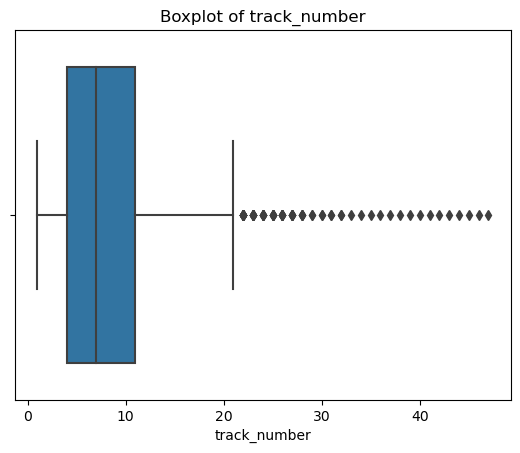

In [15]:
sns.boxplot(x='track_number', data=data)
plt.title('Boxplot of track_number')
plt.show()

Text(0.5, 1.0, 'Boxplot of acousticness')

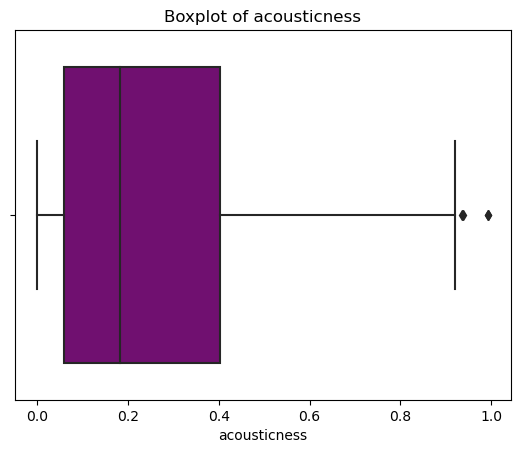

In [16]:
sns.boxplot(x='acousticness', data=data, color='purple');
plt.title('Boxplot of acousticness')

Text(0.5, 1.0, 'Boxplot of danceability')

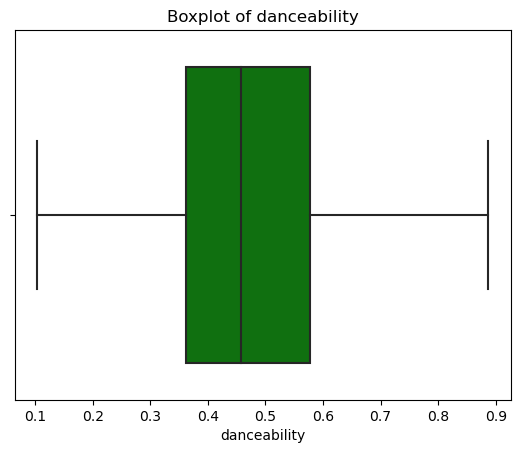

In [17]:
sns.boxplot(x='danceability', data=data, color='g');
plt.title('Boxplot of danceability')

Text(0.5, 1.0, 'Boxplot of energy')

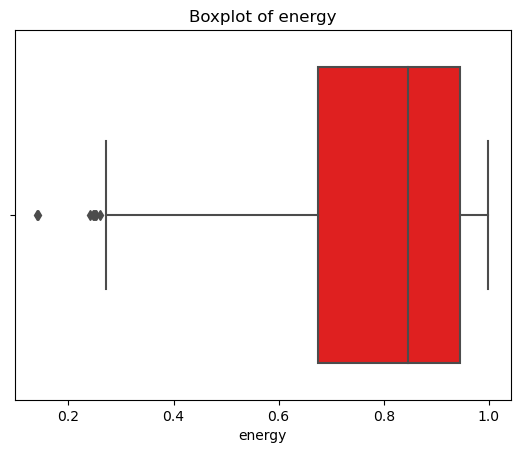

In [18]:
sns.boxplot(x='energy', data=data, color='r');
plt.title('Boxplot of energy')

Text(0.5, 1.0, 'Boxplot of instrumentalness')

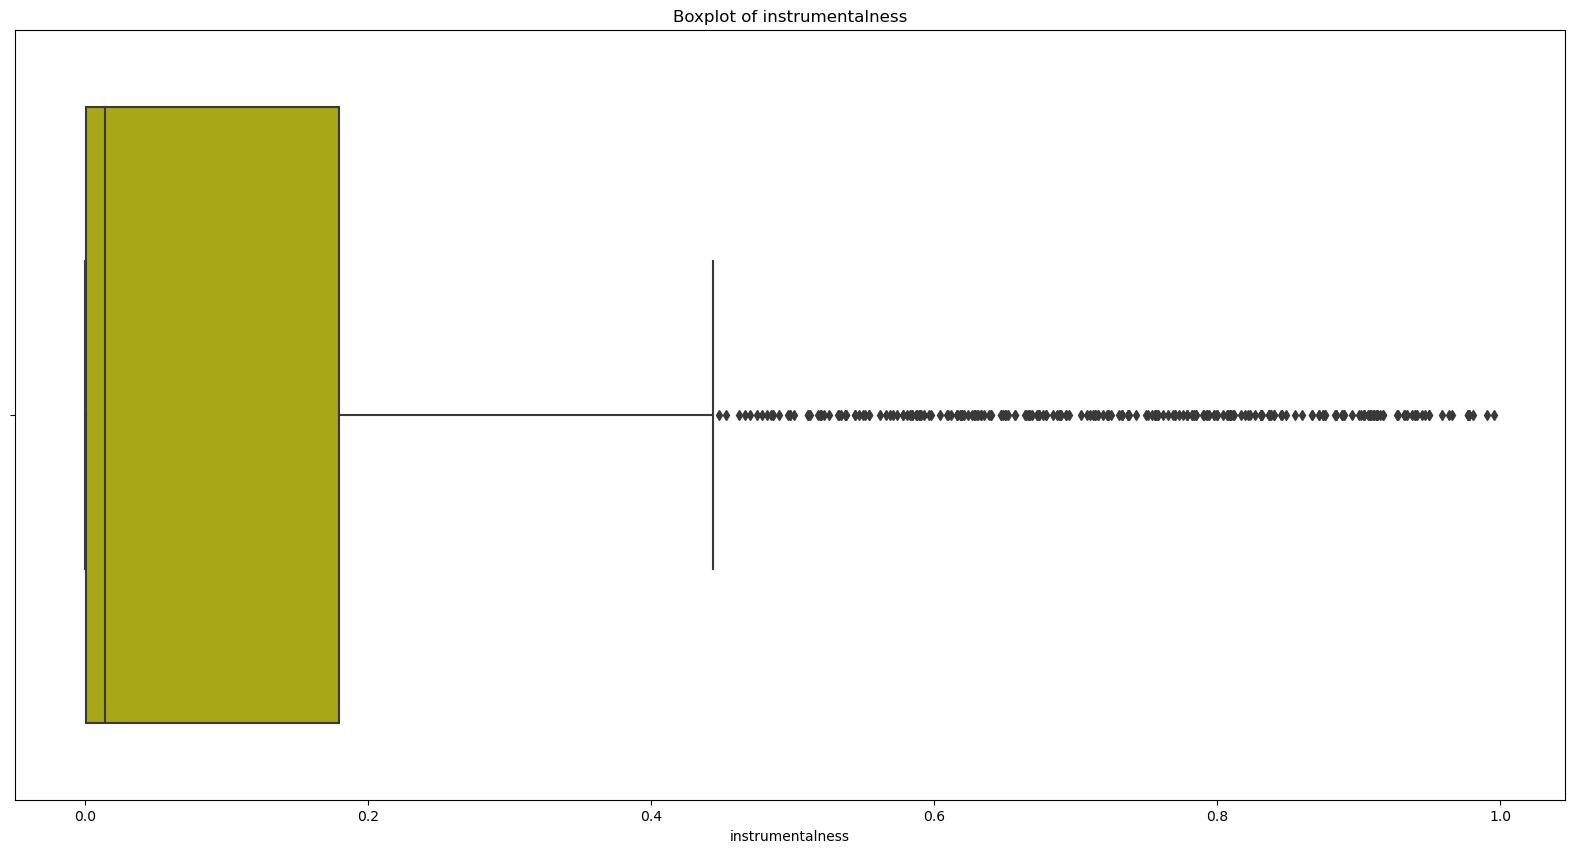

In [19]:
plt.figure(figsize=[20,10])
sns.boxplot(x='instrumentalness', data=data, color='y');
plt.title('Boxplot of instrumentalness')

Text(0.5, 1.0, 'Boxplot of liveness')

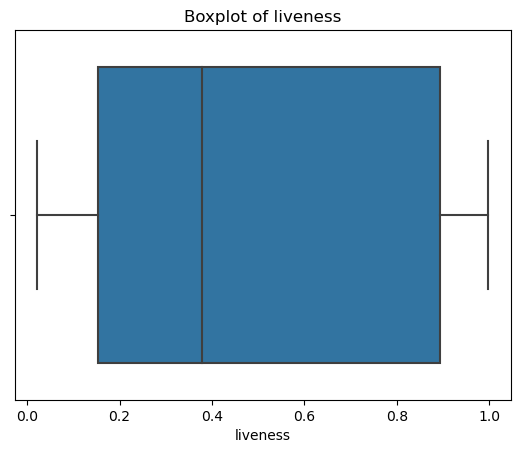

In [20]:
sns.boxplot(x='liveness', data=data);
plt.title('Boxplot of liveness')

Text(0.5, 1.0, 'Boxplot of loudness')

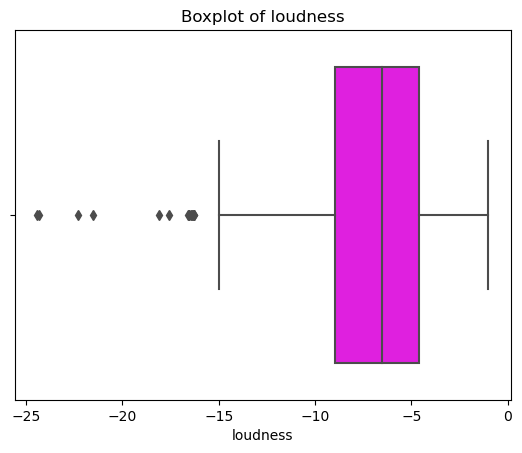

In [21]:
sns.boxplot(x='loudness', data=data, color='magenta');
plt.title('Boxplot of loudness')

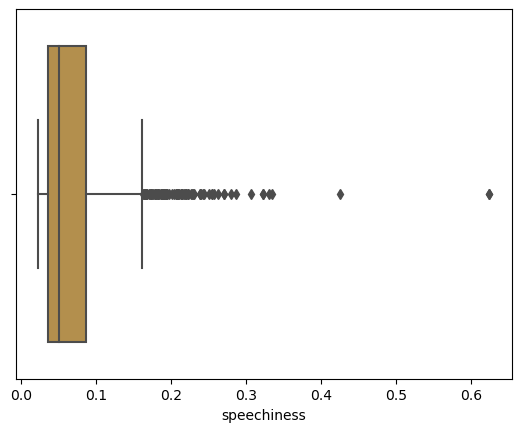

In [22]:
sns.boxplot(x='speechiness', data=data, color='orange', saturation=0.4);

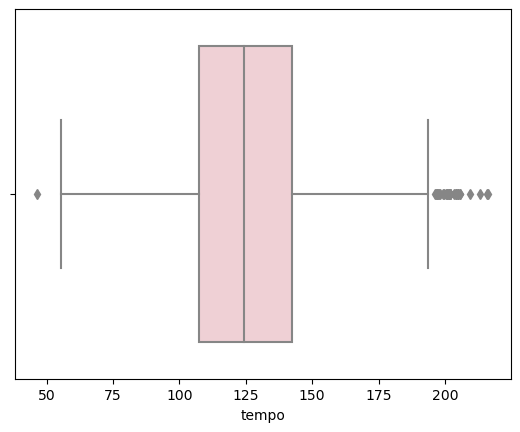

In [23]:
sns.boxplot(x='tempo', data=data, color='pink', saturation=0.5);

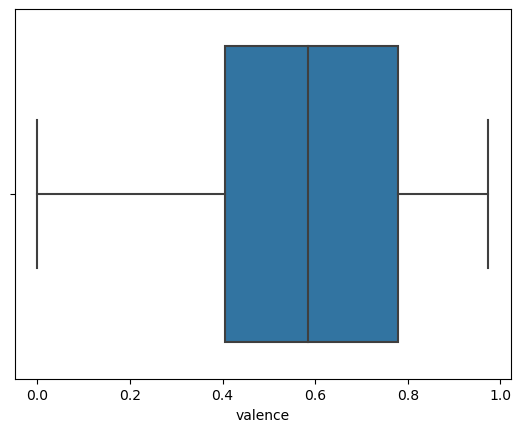

In [24]:
sns.boxplot(x='valence', data=data);

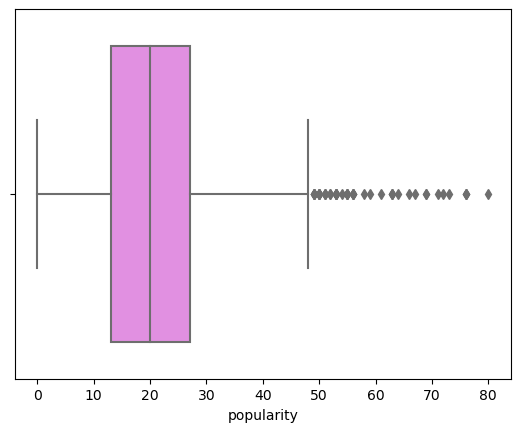

In [25]:
sns.boxplot(x='popularity', data=data, color='violet');

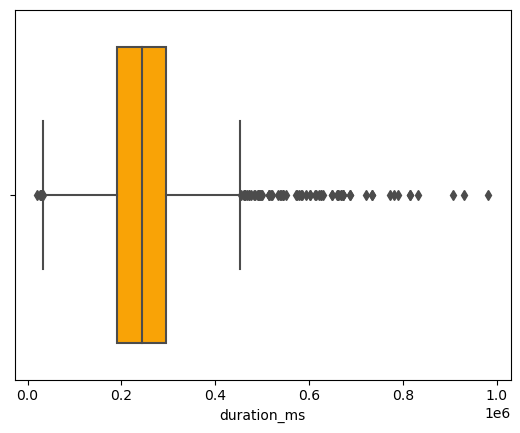

In [26]:
sns.boxplot(x='duration_ms', data=data, color='orange', saturation=.95);

<div class="alert alert-danger">
The boxplots show that 'track_no', 'speechiness', 'instrumentalness', 'popularity', 'duration_ms' have more no. of outliers

In [27]:
# define a function to remove outliers using interquartile range. ie, the difference between the 75th percentile and the 
#25th percentile  
def remove_outliers(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5 * iqr
    upper_bound=q3+1.5*iqr
    df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
    return df


In [28]:
# call the function to remove outliers
data=remove_outliers(data,'track_number')
data=remove_outliers(data, 'speechiness' )
data=remove_outliers(data, 'instrumentalness')
data=remove_outliers(data, 'popularity')
data=remove_outliers(data, 'duration_ms')

In [29]:
# after removing the outliers, let us check the number of rows and columns in the dataframe
data.shape

(1105, 15)

In [30]:
data.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.437,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.318,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.416,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.313,34,263160
4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,0.400,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.206,32,305106
5,Monkey Man - Live,Licked Live In NYC,2022-06-10,6,0.275,0.340,0.956,0.125000,0.741,-5.539,0.0915,101.628,0.125,31,244293
6,Angie - Live,Licked Live In NYC,2022-06-10,7,0.561,0.262,0.810,0.000003,0.972,-6.851,0.0969,77.520,0.394,31,245506


### Albums based on the number popular songs

In [31]:
d1=data.groupby(['album'])['popularity'].mean().sort_values(ascending=False)

In [32]:
d1.head(10)

album
Some Girls                                                   42.333333
Sticky Fingers (Remastered)                                  42.333333
Tattoo You (2009 Re-Mastered)                                40.125000
Exile On Main Street (2010 Re-Mastered)                      39.750000
Beggars Banquet (50th Anniversary Edition)                   38.500000
Let It Bleed (50th Anniversary Edition / Remastered 2019)    38.333333
Aftermath                                                    36.571429
Black And Blue (Remastered 2009)                             36.428571
Blue & Lonesome                                              34.666667
Out Of Our Heads                                             33.500000
Name: popularity, dtype: float64

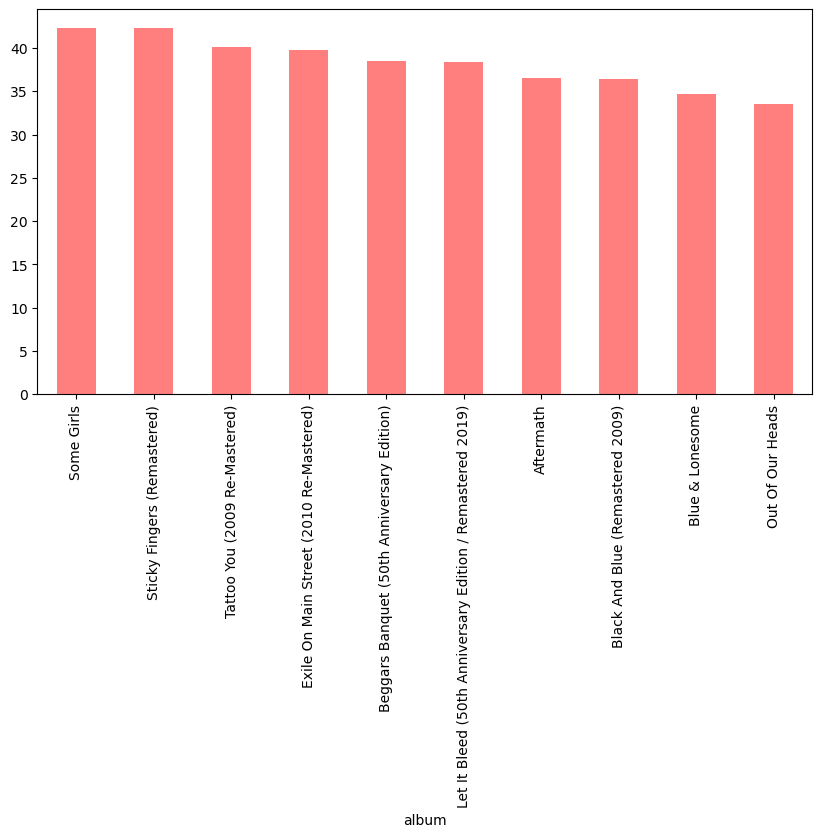

In [33]:
plt.figure(figsize=(10,5))
d1.head(10).plot(kind='bar', color='r', alpha=0.5);

<div class="alert alert-info">
From the above barplot, it is noted that 'Some Girls' and 'Sticky Fingers' are the  2 most popular albums.

In [34]:
# let us make a new dataframe having only those features which are necessary for the analysis
df1=data.drop(['name', 'album', 'release_date', 'track_number'], axis=1)
df1.head(2)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
1,0.437,0.326,0.965,0.233,0.961,-4.803,0.0759,131.455,0.318,34,253173
2,0.416,0.386,0.969,0.400,0.956,-4.936,0.1150,130.066,0.313,34,263160


In [35]:
d=df1.columns
d

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

## EDA

Let us understand the data through visualization

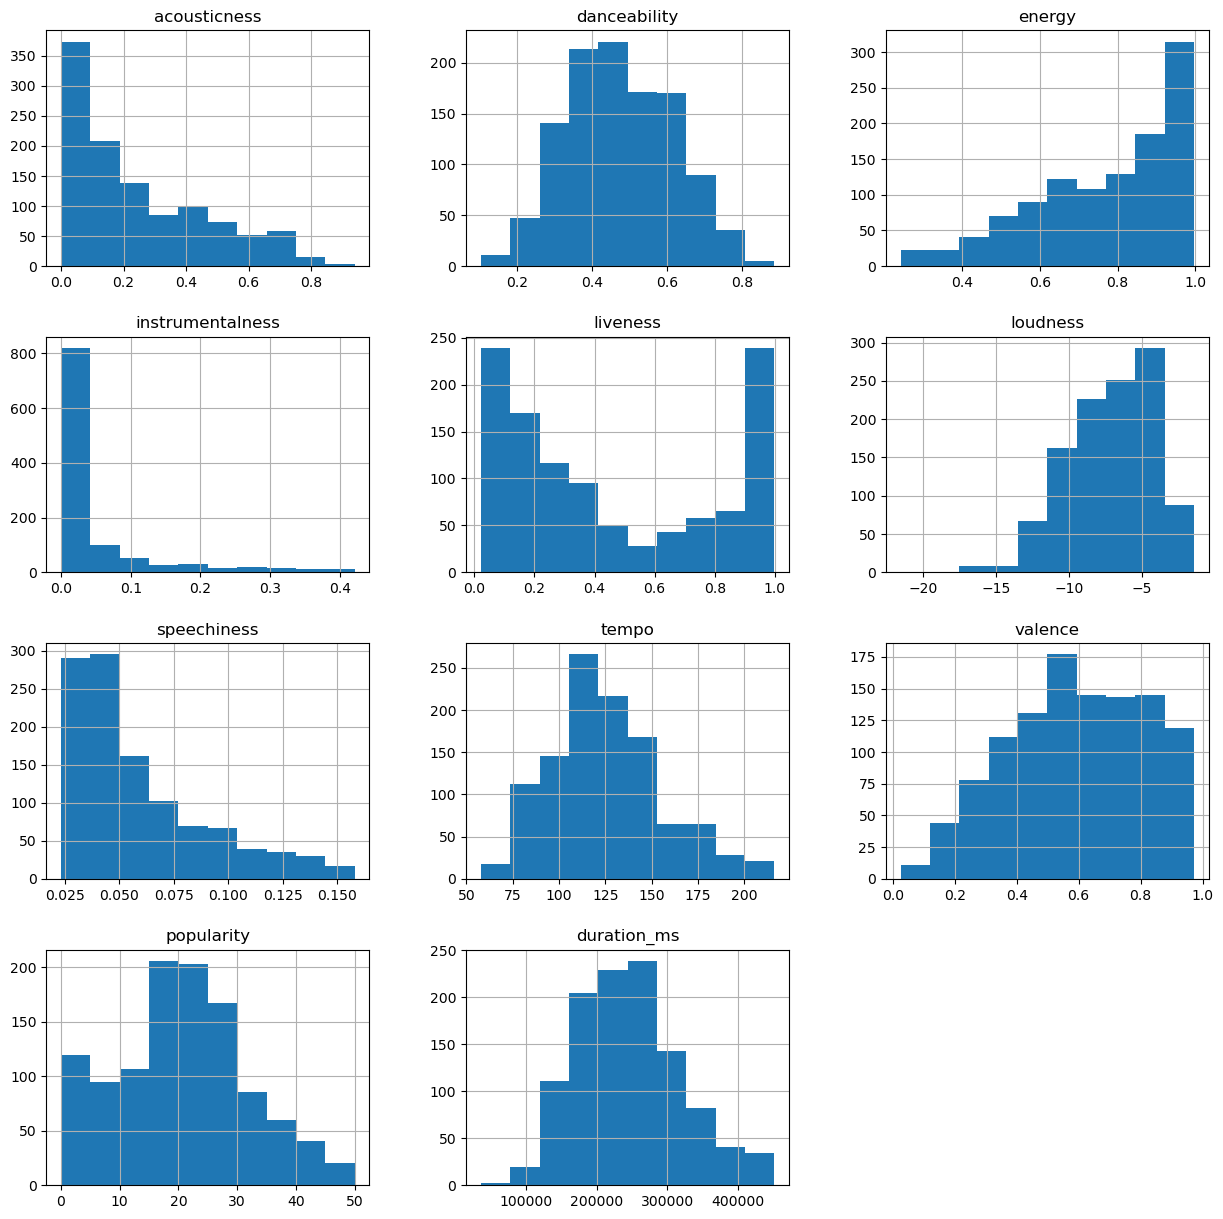

In [36]:
df1.hist(figsize=(15,15));

<div class="alert alert-info">
From the above histograms, we can clearly see that 'acousticness', 'speechiness' and 'instrumentlness' are right skewed whereas, the features, 'tempo' and 'loudness' are left skewed

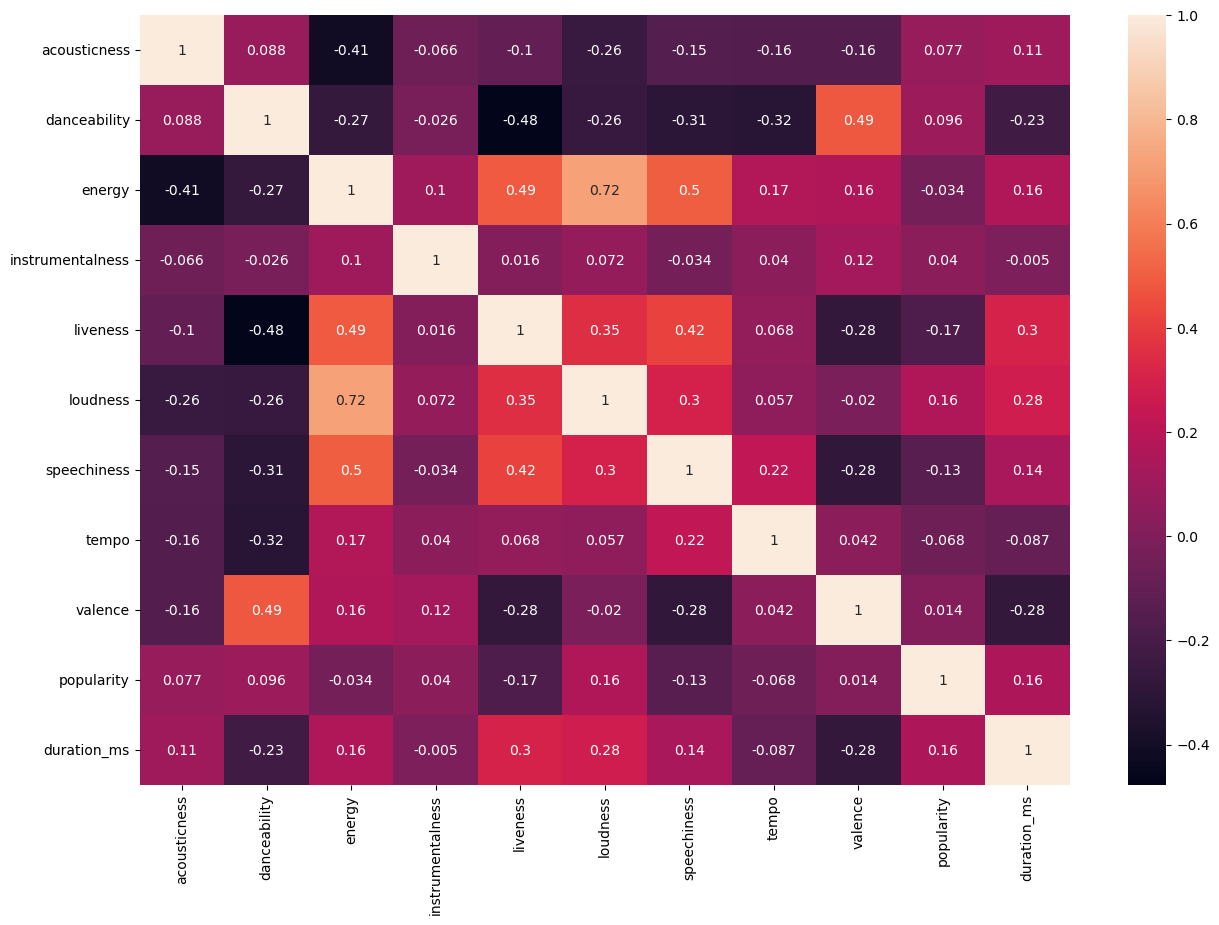

In [37]:
# Correlation between the features using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(), annot=True);

<div class="alert alert-danger">
The features where the regions are dark are negatively correlated and the regions that are light indicates positive correlation.
'popularity' is negatively correlated with 'liveness', 'speechiness', 'tempo' and 'energy'. 

### Change of popularity of a song with time

<Axes: xlabel='release_date', ylabel='popularity'>

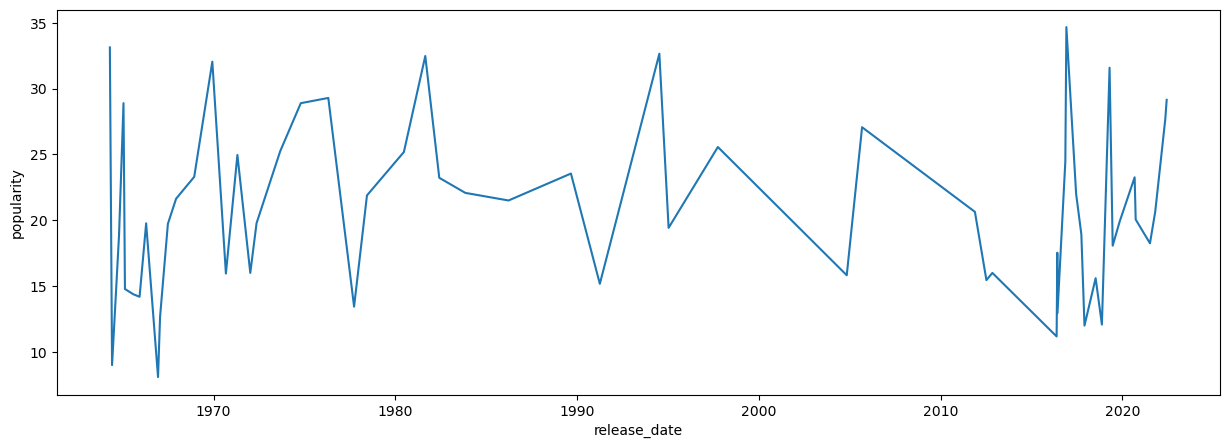

In [38]:
plt.figure(figsize=(15,5))
sns.lineplot(x='release_date', data=data, y='popularity', ci=None)

<div class="alert alert-success">
The linechart shows that after every few years popularity of a song goes down and again gains popularity. The popularity has reached its maximum between 2015 and 2020. 

# Principal Component Analysis

<div class="alert alert-info">
When features are more in number, it often happens that the accuracy goes down. It therefore becomes neccesary to do dimensionality reduction. PCA is one such statistical technique which reduces the number of dimensions from a large dataset and creates new variables while keeping the variation in the data as much as possible, thereby reduces the complexity of the data and increases the accuracy.

Feature Scaling using MinMax scaler

In [39]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
df1=mms.fit_transform(df1)
df1=pd.DataFrame(df1)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.465384,0.283525,0.957616,0.553444,0.962094,0.830358,0.390950,0.464783,0.309145,0.68,0.522914
1,0.443019,0.360153,0.962914,0.950119,0.956972,0.823763,0.681009,0.456021,0.303871,0.68,0.546952
2,0.425980,0.254151,0.962914,0.132779,0.967216,0.815729,0.517804,0.458967,0.191014,0.64,0.647913
3,0.292858,0.301405,0.945695,0.296912,0.736707,0.793861,0.506677,0.276638,0.105580,0.62,0.501540
4,0.597440,0.201788,0.752318,0.000007,0.973363,0.728801,0.546736,0.124568,0.389305,0.62,0.504460


In [40]:
df2=df1
df2.columns=d
df1.columns=d

## Building the Model using KMeans Clustering

<div class="alert alert-info">
The tricky part of kmeans clustering is to find the optimum values of n_clusters. we can find it using the 'Elbow method'

In [41]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

In [42]:
#within cluster sum of squares
wcss

[615.1627283742777,
 448.60635725946383,
 392.5455338257955,
 364.85534159065577,
 340.4245168745535,
 322.7812205271325,
 308.5887527302543,
 295.44141926415386,
 284.7866208120545,
 275.4632174605184,
 266.1240660881451,
 257.2769166725088,
 250.02642883847656,
 244.86925002448663]

In [43]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

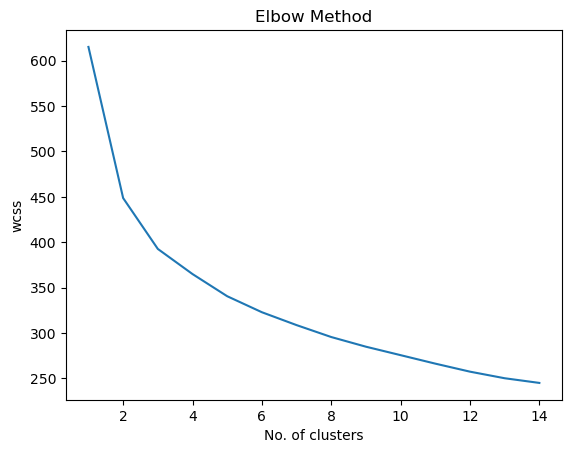

In [44]:
# Let us visualize using scree plot
plt.plot(range(1,15), wcss)
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.title('Elbow Method')
plt.show()

<div class="alert alert-info">
    On observing the above plot, we can see that the last elbow is at 5. Hence we shall take the number of clusters to be 5

In [45]:
# fit the data to the kmeans model
kmeansmodel=KMeans(n_clusters=5, random_state=0)
y_kmeans=kmeansmodel.fit_predict(df1)

In [46]:
df1['cluster']=y_kmeans
df1.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,cluster
0,0.465384,0.283525,0.957616,0.553444,0.962094,0.830358,0.390950,0.464783,0.309145,0.68,0.522914,3
1,0.443019,0.360153,0.962914,0.950119,0.956972,0.823763,0.681009,0.456021,0.303871,0.68,0.546952,3
2,0.425980,0.254151,0.962914,0.132779,0.967216,0.815729,0.517804,0.458967,0.191014,0.64,0.647913,3
3,0.292858,0.301405,0.945695,0.296912,0.736707,0.793861,0.506677,0.276638,0.105580,0.62,0.501540,3
4,0.597440,0.201788,0.752318,0.000007,0.973363,0.728801,0.546736,0.124568,0.389305,0.62,0.504460,3


In [47]:
clusters= df1.groupby('cluster').mean()
print(clusters)

         acousticness  danceability    energy  instrumentalness  liveness  \
cluster                                                                     
0            0.213903      0.604314  0.503216          0.067638  0.173104   
1            0.523719      0.476898  0.391867          0.059347  0.214799   
2            0.274032      0.407732  0.793866          0.109362  0.844665   
3            0.155646      0.314022  0.936694          0.100454  0.852160   
4            0.167195      0.547599  0.816866          0.164354  0.203582   

         loudness  speechiness     tempo   valence  popularity  duration_ms  
cluster                                                                      
0        0.570281     0.165184  0.423486  0.725854    0.247404     0.344291  
1        0.624843     0.131634  0.352314  0.391018    0.508750     0.543718  
2        0.753739     0.236311  0.413051  0.612874    0.333390     0.553117  
3        0.818429     0.622178  0.493295  0.401346    0.367330     0.5

In [48]:
c1=df1[df1['cluster']==0]
c2=df1[df1['cluster']==1]
c3=df1[df1['cluster']==2]
c4=df1[df1['cluster']==3]
c5=df1[df1['cluster']==4]

In [49]:
kmeansmodel.cluster_centers_

array([[0.21390277, 0.60431403, 0.50321574, 0.06763839, 0.17310352,
        0.57028085, 0.16518418, 0.42348584, 0.72585353, 0.24740385,
        0.34429096],
       [0.52371901, 0.47689841, 0.39186672, 0.05934668, 0.21479933,
        0.62484323, 0.13163406, 0.35231432, 0.39101778, 0.50875   ,
        0.54371817],
       [0.27403183, 0.4077321 , 0.79386575, 0.10936226, 0.8446646 ,
        0.75373909, 0.23631054, 0.41305105, 0.61287428, 0.33338983,
        0.55311712],
       [0.15564599, 0.31402245, 0.93669429, 0.10045445, 0.85215981,
        0.81842851, 0.62217829, 0.49329493, 0.40134609, 0.36732984,
        0.5924828 ],
       [0.16719467, 0.5475987 , 0.81686598, 0.16435447, 0.20358179,
        0.78213918, 0.22434248, 0.44058638, 0.76920141, 0.52726619,
        0.49805362]])

In [50]:
#Evaluation metrics of kmeans clustering
from sklearn.metrics import silhouette_score
cluster_s=df1['cluster']
s1=silhouette_score(df1, cluster_s, metric='euclidean')

In [51]:
print(s1)

0.46563593934140046


<div class="alert alert-info"> 
The Silhoutte score has given a value of 0.47 which means the model has performed poorly

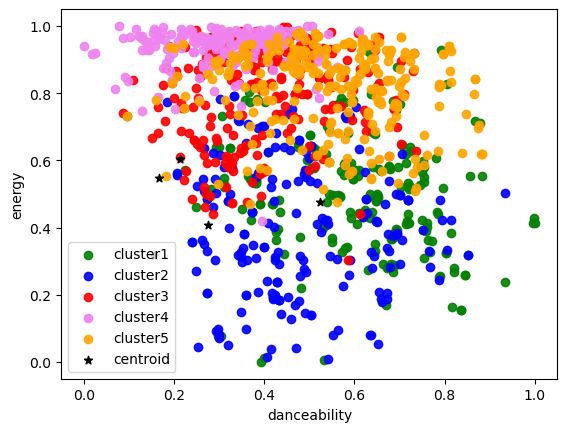

In [52]:
#Visualizing the clusters using scatterplot
plt.scatter( c1['danceability'], c1['energy'], color='g', alpha=0.9, label='cluster1')
plt.scatter( c2['danceability'], c2['energy'], color='b', alpha=0.9, label='cluster2')
plt.scatter(c3['danceability'], c3['energy'], color='r', alpha=0.9, label='cluster3')
plt.scatter(c4['danceability'], c4['energy'], color='violet', alpha=0.9, label='cluster4')
plt.scatter(c5['danceability'], c5['energy'], color='orange', alpha=0.9, label='cluster5')

plt.scatter(kmeansmodel.cluster_centers_[:,0],kmeansmodel.cluster_centers_[:,1], color='black',marker='*',label='centroid');
plt.xlabel('danceability')
plt.ylabel('energy')
plt.legend()
plt.show()

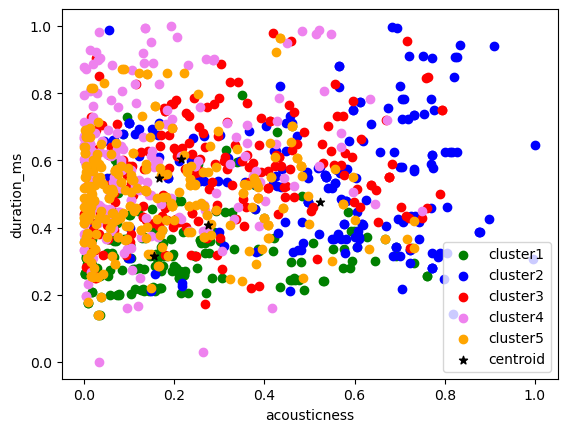

In [53]:
plt.scatter( c1['acousticness'], c1['duration_ms'], color='g', label='cluster1')
plt.scatter( c2['acousticness'], c2['duration_ms'], color='b', label='cluster2')
plt.scatter( c3['acousticness'], c3['duration_ms'], color='r', label='cluster3')
plt.scatter(c4['acousticness'], c4['duration_ms'], color='violet', label='cluster4')
plt.scatter( c5['acousticness'], c5['duration_ms'], color='orange', label='cluster5')

plt.scatter(kmeansmodel.cluster_centers_[:,0],kmeansmodel.cluster_centers_[:,1], color='black',marker='*',label='centroid')
plt.xlabel('acousticness')
plt.ylabel('duration_ms')
plt.legend()
plt.show()

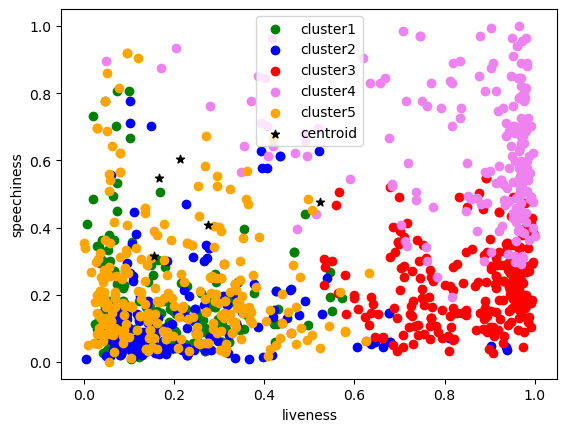

In [54]:
plt.scatter(c1['liveness'], c1['speechiness'], color='g', label='cluster1')
plt.scatter(c2['liveness'], c2['speechiness'], color='b', label='cluster2')
plt.scatter(c3['liveness'], c3['speechiness'], color='r', label='cluster3')
plt.scatter(c4['liveness'], c4['speechiness'], color='violet', label='cluster4')
plt.scatter(c5['liveness'], c5['speechiness'], color='orange', label='cluster5')

plt.scatter(kmeansmodel.cluster_centers_[:,0],kmeansmodel.cluster_centers_[:,1], color='black',marker='*',label='centroid')
plt.xlabel('liveness')
plt.ylabel('speechiness')
plt.legend()
plt.show()

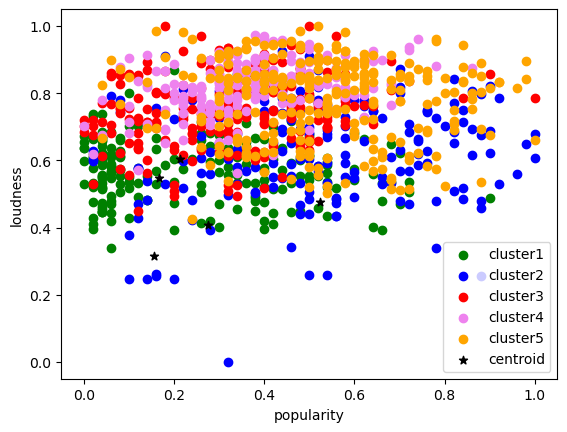

In [55]:
plt.scatter(c1['popularity'], c1['loudness'], color='g', label='cluster1')
plt.scatter(c2['popularity'], c2['loudness'], color='b', label='cluster2')
plt.scatter(c3['popularity'], c3['loudness'], color='r', label='cluster3')
plt.scatter(c4['popularity'], c4['loudness'], color='violet', label='cluster4')
plt.scatter(c5['popularity'], c5['loudness'], color='orange', label='cluster5')

plt.scatter(kmeansmodel.cluster_centers_[:,0],kmeansmodel.cluster_centers_[:,1], color='black',marker='*',label='centroid')
plt.xlabel('popularity')
plt.ylabel('loudness')
plt.legend()
plt.show()

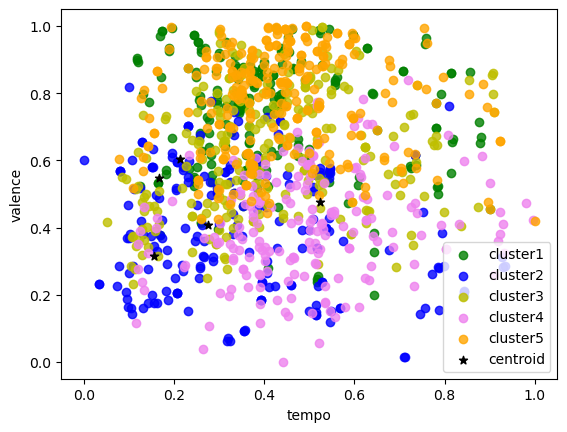

In [56]:
plt.scatter(c1['tempo'], c1['valence'], color='g', alpha=0.8, label='cluster1')
plt.scatter(c2['tempo'], c2['valence'], color='b', alpha=0.8,  label='cluster2')
plt.scatter(c3['tempo'], c3['valence'], color='y', alpha=0.8, label='cluster3')
plt.scatter(c4['tempo'], c4['valence'], color='violet', alpha=0.8, label='cluster4')
plt.scatter(c5['tempo'], c5['valence'], color='orange', alpha=0.8,  label='cluster5')

plt.scatter(kmeansmodel.cluster_centers_[:,0],kmeansmodel.cluster_centers_[:,1], color='black',marker='*',label='centroid')
plt.xlabel('tempo')
plt.ylabel('valence')
plt.legend()
plt.show()

<div class="alert alert-info">
Because of the size of the dataset, clustering has not occured satisfactorilty. We can try to apply clustering after dimensionality reduction using PCA.

In [57]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(df2)

PCA()

In [58]:
pca.explained_variance_ratio_

array([0.8110837 , 0.06381024, 0.02879953, 0.01933775, 0.01498949,
       0.0149394 , 0.01285625, 0.0116772 , 0.00877044, 0.00729977,
       0.00420447, 0.00223177])

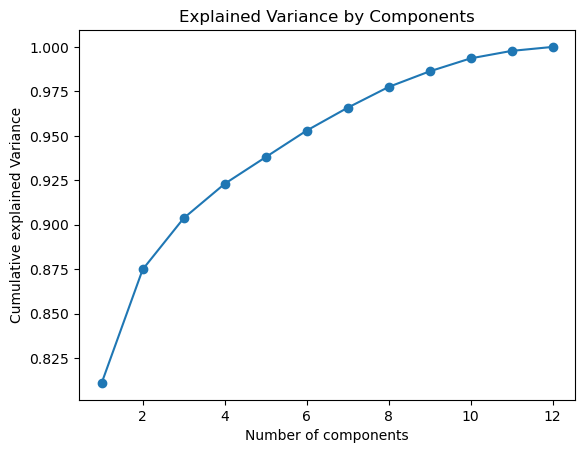

In [60]:
plt.plot(range(1,13), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.ylabel('Cumulative explained Variance')
plt.xlabel('Number of components')
plt.title('Explained Variance by Components')
plt.show()

<div class="alert alert-danger">
From the above graph, we can set the optimum number of components to 3

In [61]:
pca=PCA(n_components=3)
pca.fit(df2)

PCA(n_components=3)

In [62]:
scores_pca=pca.transform(df2)
scores_pca

array([[-0.94234961,  0.49623067,  0.31157712],
       [-0.96660707,  0.55724082,  0.24999554],
       [-0.94078535,  0.61633208,  0.40793483],
       ...,
       [-1.82004733, -0.70467826,  0.04388461],
       [ 2.16394558, -0.25526542, -0.04169695],
       [-1.84626158, -0.73730778, -0.07194791]])

In [63]:
wcss1=[]
for i in range(1,10):
    kmeans_pca=KMeans(n_clusters=i, random_state=0)
    kmeans_pca.fit(scores_pca)
    wcss1.append(kmeans_pca.inertia_)

Text(0, 0.5, 'wcss')

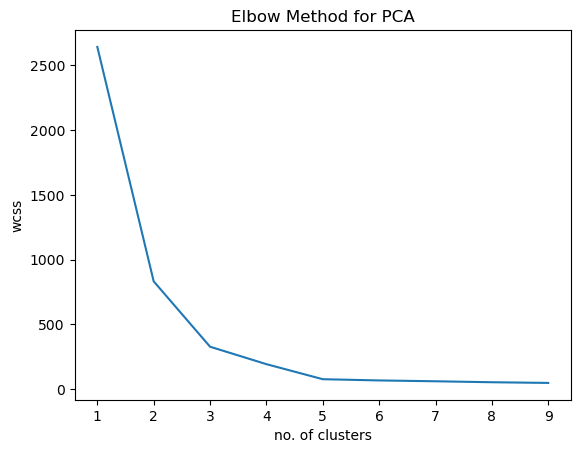

In [64]:
plt.plot(range(1,10), wcss1)
plt.title('Elbow Method for PCA')
plt.xlabel('no. of clusters')
plt.ylabel('wcss')

<div class="alert alert-info">
Clearly the elbow ends at 5. so, the oiptimum number of clusters should be set at 5

In [65]:
#fit the reduced data to the kmeans model
kmeans_pca=KMeans(n_clusters=5, random_state=0)
df2_pca=kmeans_pca.fit_predict(scores_pca)

In [66]:
df2=pd.DataFrame(scores_pca)
df2.columns=['component1', 'component2', 'component3']
df2['df2_cluster']=kmeans_pca.labels_
df2.head()

,component1,component2,component3,df2_cluster
0,-0.942350,0.496231,0.311577,3
1,-0.966607,0.557241,0.249996,3
2,-0.940785,0.616332,0.407935,3
3,-0.924952,0.411908,0.340625,3
4,-0.896825,0.485357,0.501862,3


In [67]:
df2.groupby('df2_cluster').mean()

,component1,component2,component3
df2_cluster,,,
0,-1.864147,-0.419689,-0.058451
1,2.156611,-0.180155,-0.253591
2,0.094579,0.371599,-0.029665
3,-0.938503,0.545052,0.020222
4,1.180163,-0.196127,0.375702


In [68]:
kmeans_pca.cluster_centers_

array([[-1.86414684, -0.41968916, -0.05845122],
       [ 2.15661071, -0.18015511, -0.25359101],
       [ 0.09457896,  0.37159858, -0.02966509],
       [-0.9385029 ,  0.54505187,  0.02022247],
       [ 1.18016258, -0.19612668,  0.37570228]])

In [69]:
cl1=df2[df2['df2_cluster']==0]
cl2=df2[df2['df2_cluster']==1]
cl3=df2[df2['df2_cluster']==2]
cl4=df2[df2['df2_cluster']==3]
cl5=df2[df2['df2_cluster']==4]

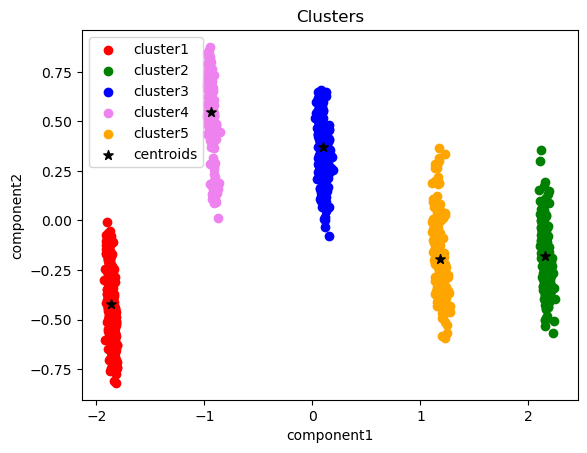

In [70]:
# Visualize the clusters using scatterplot
plt.scatter(cl1['component1'], cl1['component2'], color='r', label='cluster1')
plt.scatter(cl2['component1'], cl2['component2'], color='g', label='cluster2')
plt.scatter(cl3['component1'], cl3['component2'], color='b', label='cluster3')
plt.scatter(cl4['component1'], cl4['component2'], color='violet', label='cluster4')
plt.scatter(cl5['component1'], cl5['component2'], color='orange', label='cluster5')

plt.scatter(kmeans_pca.cluster_centers_[:,0], kmeans_pca.cluster_centers_[:,1], s=50, marker='*', color='black', label='centroids');
plt.xlabel('component1')
plt.ylabel('component2')
plt.title('Clusters')
plt.legend()

Evaluation Metrics

In [71]:
clusterz=df2['df2_cluster']

In [72]:
from sklearn.metrics import silhouette_score

In [73]:
s2=silhouette_score(scores_pca, clusterz, metric='euclidean')

In [74]:
print(s2)

0.7232687871666578


## Inference

## After reducing the dimensions of the dataset using PCA, the clustering is satisfactory. The Silhoutte Score is also at 72%, which is much better than the earlier clustering metrics which gave 47% Silhoutte Score.